# Task 1 of sheet 4
Numerical Methods 2, WS 2021/22<br>
by Clemens Wager

(3 Points) Write a program/script where you investigate convergence of the power iteration and
the Rayleigh quotient estimate to the eigenvalue. For that purpose, generate a symmetric matrix.<br>
Investigate the convergence of the Rayleigh quotient estimate to the largest eigenvalue and
the error in approximation of the eigenvector.<br>Plot the errors against iteration number in a semilogarithmic
plot. Also illustrate the "speed of convergence" given by q^k, where q = |lambda_2/lambda_1|, the
ratio of the largest and second largest eigenvalue in absolute terms. 

_Hints: Generate a random matrix
and take its symmetric part; Use built-in/package functions to compute the reference solutions
used to calculate the errors (reference = true eigenpair); Note that the reference and the approximated eigenvector should be normalized and point in the same direction. The latter can be guaranteed by investigating the sign of the inner product of the reference and the approximated eigenvector._

In [1]:
import numpy as np
import scipy.sparse.linalg as spla
import scipy.sparse as sparse
import matplotlib.pyplot as plt

#### Define the necessary functions

In [2]:
 # Define a function that executes power iteration 

def poweriter(A, v, true_vec, true_vec_norm, true_val, tol):
    """ 
    Power iteration 
    Input:
        A: system matrix
        v: initial rank vector
        true_vec: true largest eigenvector to fix direction
        true_vec_norm: norm of the true eigenvector for convergence criterium
        true_val: the true eigenvalue (computed with package function)
        tol: tolerance
    Return:
        v: the eigenvector accociated with the largest eigenvalue
        vec_con_errs: list of convergence error in each iteration
        iters: number of iterations
    """
    n = len(A)
    count = 0
    vec_con_errs = [] # list of errors
    val_con_errs = [] # list of errors
    vec_relerror = np.inf # initial relative convergence error in the eigenvector
    
    #for i in range(n):
    while vec_relerror > tol:
        # calculate the current relative convergence error of eigenvector and add it to list        
        vec_relerror = (np.linalg.norm(true_vec - v) /
                        np.linalg.norm(true_vec)) # relative error
        vec_con_errs.append(vec_relerror)
        
        #print(f"vec_relerror: {vec_relerror}")
    
        # calculate the current relative convergence error of eigenvector and add it to list        
        val_con_errs.append( abs((true_val-rayquoc(A,v)) / true_val) )

        # calculate the matrix-vector product
        Av = np.dot(A, v)
        
        # calculate the norm
        Av_norm = np.linalg.norm(Av)
        
        # normalize and update the vector
        v = Av / Av_norm
        
        # check and correct direction if necessary 
        if np.dot(v, true_vec) < 0:
            v = -v
        count+=1 # increment counter
    
    return v, vec_con_errs, val_con_errs, count

In [3]:
 # Define a function for the Rayleigh quotient 

def rayquoc(A, x):
    """ 
    Rayleigh quotient (compact)
    Input: 
        A: symmetric system matrix
        x: an eigenvector of A
    Returns the eigenvalue associated with the input eigenvector
    """   
    return np.dot(np.dot(x,A),x) / np.dot(x,x)

#### Generate a sparse symmetric reproducible matrix S

In [4]:
# generate symmetric matrix S
n = 1000
density = 0.3

# Set a seed for uniform(). ATTENTION random.seed() from random library does not work with other libraries!
np.random.seed(42)

#Let U be a square matrix of uniformly distributed random numbers.
#U = np.random.uniform(low=0, high=1.0, size=(n, n))
U = sparse.random(n,n, density=density)

# symmetrize
U = U.toarray()
S = np.tril(U) + np.tril(U, -1).T
print(f"n = {n}\n")
print(f"Upper matrix =\n{U}\n")
print(f"Symmetric matrix =\n{S}\n")

# Source: https://cmdlinetips.com/2019/02/how-to-create-random-sparse-matrix-of-specific-density/

n = 1000

Upper matrix =
[[0.85154491 0.         0.         ... 0.40768954 0.59623289 0.        ]
 [0.         0.         0.         ... 0.         0.68889557 0.        ]
 [0.         0.68306025 0.         ... 0.8101654  0.         0.        ]
 ...
 [0.         0.         0.88648589 ... 0.31959347 0.26062093 0.75103098]
 [0.         0.         0.         ... 0.         0.         0.30196122]
 [0.         0.         0.         ... 0.77886505 0.         0.        ]]

Symmetric matrix =
[[0.85154491 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.68306025 ... 0.         0.         0.        ]
 [0.         0.68306025 0.         ... 0.88648589 0.         0.        ]
 ...
 [0.         0.         0.88648589 ... 0.31959347 0.         0.77886505]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.77886505 0.         0.        ]]



#### Compute eigenvalue and the associated eigenvector (SCIPY)

In [5]:
# Compute reference solution
v0 = np.ones(n)
v0_normal = v0/np.linalg.norm(v0)

scytol = 0
vals, vecs = spla.eigs(A=S,  # system matrix
                       k=2,  # the number of eigenvalues and eigenvectors desired
                       v0 = v0,  # starting vector
                       which = 'LM',  # which k eigenvectors and eigenvalues to find
                       tol = scytol,  # standard=0 (machine precision)
                       return_eigenvectors = True
                      )

# eigenVALUE
print(f"1st largest eigenvalue (scipy) = {vals[0]}")
print(f"2nd largest eigenvalue (scipy) = {vals[1]}\n")

# convergence speed q
q = abs(vals[1]/vals[0])
print(f"Convergence speed q given by |lam2/lam1|\nq = {q}\n")

# eigenVECTOR
vec = vecs[:,0]
true_v_norm = np.linalg.norm(vec)
print(f"Eigenvector (scipy) =\n{vecs[:4]}...\n")
print(f"Norm of true eigenvector (true_v_norm) = {true_v_norm}\n")

1st largest eigenvalue (scipy) = (150.63238332105345+0j)
2nd largest eigenvalue (scipy) = (-17.504711140135566+0j)

Convergence speed q given by |lam2/lam1|
q = 0.11620815361346662

Eigenvector (scipy) =
[[ 0.03394222+0.j  0.01452496+0.j]
 [ 0.03126797+0.j -0.01843131+0.j]
 [ 0.02967346+0.j -0.01974107+0.j]
 [ 0.03178182+0.j  0.0049513 +0.j]]...

Norm of true eigenvector (true_v_norm) = 0.9999999999999994



#### Compute largest eigenvalue and associated eigenvector with IMPLEMENTATION

In [6]:
# Compute eigenvector
# input vector must be normalized for PI
v0 = np.ones(n)
v0_normal = v0/np.linalg.norm(v0)

# reference eigenvector normalized for convergence criterium
vec_norm = np.linalg.norm(vec)

# tolerance
tol = 1e-15 #1e-8 too long
print(f"tol = {tol}")

vec_tilde, vec_con_errs, val_con_errs, itercount = poweriter(S, v0_normal, vec, vec_norm, vals[0], tol)

# Compute eigenvalue (Rayleigh quotient)
val_tilde = rayquoc(S,vec_tilde)
print(f"\n1st largest eigenvalue (implementation) = {val_tilde}")
val_error = abs(val_tilde - vals[0])
print(f"The computation error in the eigenvalue = {val_error}\n")
print(f"Converged in {itercount} iterations!\n")
#5.684341886080802e-14

tol = 1e-15

1st largest eigenvalue (implementation) = 150.63238332105337
The computation error in the eigenvalue = 8.526512829121202e-14

Converged in 15 iterations!



#### Plot convergence of EIGENVECTOR

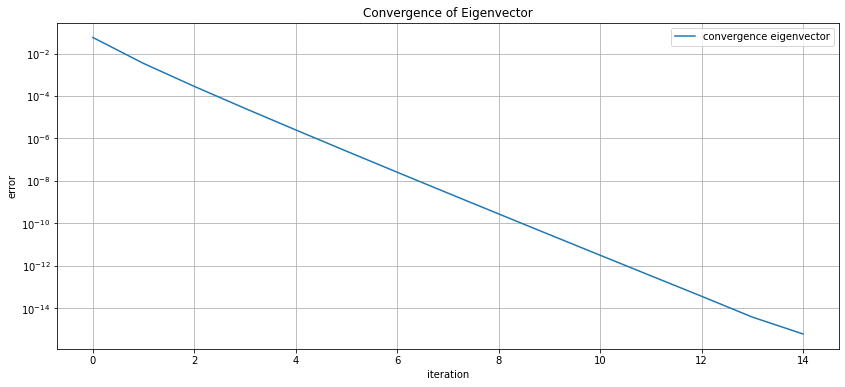

splice of eigenvector convergence errors
[0.057651263353280184, 0.0034282420622747368, 0.00028432422155562494, 2.6084000506618984e-05, 2.5176878963341267e-06, 2.5076644000464224e-07, 2.5525705681769492e-08, 2.6406006610158893e-09, 2.766323233183374e-10, 2.927723056731763e-11, 3.1249428184972604e-12, 3.357814750460599e-13, 3.630380567411611e-14, 3.78725217029298e-15, 6.058631944078259e-16]



In [7]:
# Plot convergence error over iteration number
#iters = np.arange(n)
iters = np.arange(itercount) # newcc

plt.figure(figsize=(14, 6))
plt.semilogy(iters, vec_con_errs, label="convergence eigenvector")

plt.title('Convergence of Eigenvector')
plt.xlabel('iteration')
plt.ylabel('error')
plt.grid()
plt.legend(loc='upper right')
plt.show()
print(f"splice of eigenvector convergence errors\n{vec_con_errs[:20]}\n")

#-## Plot convergence of EIGENVALUE

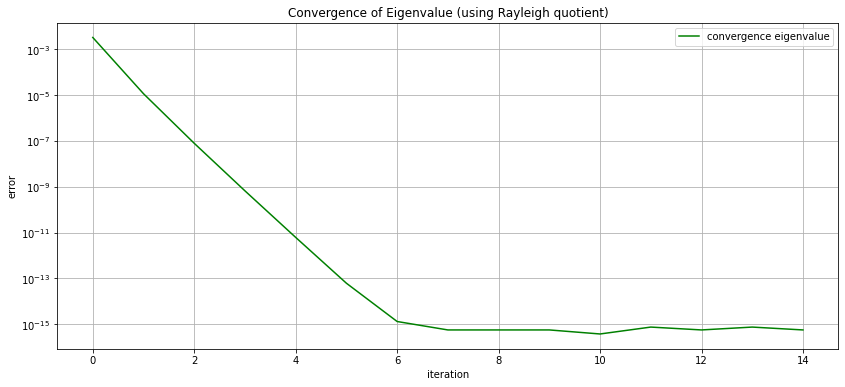

splice of eigenvalue convergence errors
[0.003301444254472034, 1.158507268958653e-05, 7.930850811433979e-08, 6.65679941788036e-10, 6.193317597287133e-12, 6.188789214934741e-14, 1.3207781861141217e-15, 5.660477940489093e-16, 5.660477940489093e-16, 5.660477940489093e-16]



In [8]:
# Plot convergence error over iteration number
iters = np.arange(itercount)

plt.figure(figsize=(14, 6))
plt.semilogy(iters, val_con_errs, label="convergence eigenvalue", color='green')

# fancy plot
#plt.xlim([0,50])

plt.title('Convergence of Eigenvalue (using Rayleigh quotient)')
plt.xlabel('iteration')
plt.ylabel('error')
plt.grid()
plt.legend(loc='upper right')
plt.show()
print(f"splice of eigenvalue convergence errors\n{val_con_errs[:10]}\n")